In [2]:
import pandas as pd
import numpy as np

In [3]:
col_names=['Id','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']

In [4]:
data= pd.read_csv('DATA/breast-cancer-wisconsin.data',names=col_names)

In [5]:
data.head()

,Id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Id                           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [7]:
#remove id column
data.drop('Id',axis=1,inplace=True)

In [8]:
for i in data.columns:
    print(i,data[i].unique())

Clump Thickness [ 5  3  6  4  8  1  2  7 10  9]
Uniformity of Cell Size [ 1  4  8 10  2  3  7  5  6  9]
Uniformity of Cell Shape [ 1  4  8 10  2  3  5  6  7  9]
Marginal Adhesion [ 1  5  3  8 10  4  6  2  9  7]
Single Epithelial Cell Size [ 2  7  3  1  6  4  5  8 10  9]
Bare Nuclei ['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']
Bland Chromatin [ 3  9  1  2  4  5  7  8  6 10]
Normal Nucleoli [ 1  2  7  4  5  3 10  6  9  8]
Mitoses [ 1  5  4  2  3  7 10  8  6]
Class [2 4]


### Filling missing data in Bare Nuclei column

In [9]:
len(data[data['Bare Nuclei']=='?'])

16

In [10]:
data.shape

(699, 10)

In [11]:
data_new=pd.DataFrame(data[data['Bare Nuclei']!='?'])

In [12]:
data_new.shape

(683, 10)

In [13]:
data_new['Bare Nuclei']=data_new['Bare Nuclei'].apply(int)

In [14]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 58.7 KB


In [15]:
data_new.corr()['Bare Nuclei']

Clump Thickness                0.593091
Uniformity of Cell Size        0.691709
Uniformity of Cell Shape       0.713878
Marginal Adhesion              0.670648
Single Epithelial Cell Size    0.585716
Bare Nuclei                    1.000000
Bland Chromatin                0.680615
Normal Nucleoli                0.584280
Mitoses                        0.339210
Class                          0.822696
Name: Bare Nuclei, dtype: float64

In [16]:
len(data_new[(data_new['Bare Nuclei']==10) & (data_new['Class']==4)])

129

In [17]:
len(data_new[(data_new['Bare Nuclei']==10) & (data_new['Class']==4) & (data_new['Uniformity of Cell Shape']>=1)])

129

In [18]:
len(data_new[(data_new['Bare Nuclei']==1) & (data_new['Class']==2)])

387

In [19]:
len(data_new[(data_new['Bare Nuclei']==1) & (data_new['Class']==4)])

15

In [20]:
len(data_new[(data_new['Bare Nuclei']==10) & (data_new['Class']==2)])

3

In [21]:
import seaborn as sns

<AxesSubplot:xlabel='Bare Nuclei', ylabel='Class'>

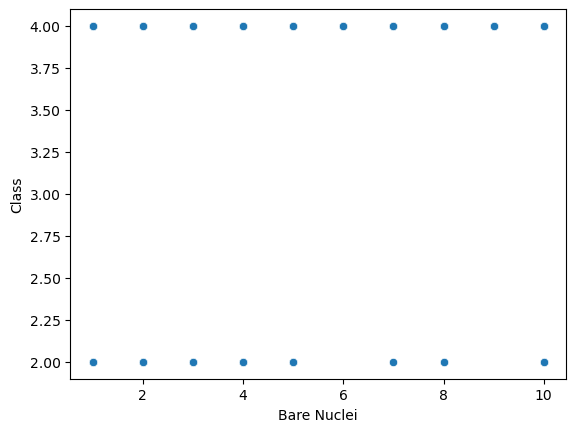

In [22]:
sns.scatterplot(x='Bare Nuclei',y='Class',data=data_new)

<AxesSubplot:xlabel='Bare Nuclei', ylabel='Uniformity of Cell Shape'>

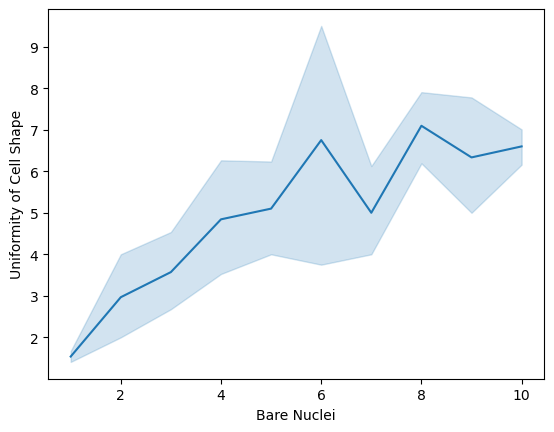

In [23]:
sns.lineplot(x='Bare Nuclei',y='Uniformity of Cell Shape',data=data_new)

In [24]:
len(data_new[data_new['Bare Nuclei']>=data_new['Uniformity of Cell Shape']])

540

In [25]:
miss_data=pd.DataFrame(data[data['Bare Nuclei']=='?'])

In [26]:
miss_data

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
23,8,4,5,1,2,?,7,3,1,4
40,6,6,6,9,6,?,7,8,1,2
139,1,1,1,1,1,?,2,1,1,2
145,1,1,3,1,2,?,2,1,1,2
158,1,1,2,1,3,?,1,1,1,2
164,5,1,1,1,2,?,3,1,1,2
235,3,1,4,1,2,?,3,1,1,2
249,3,1,1,1,2,?,3,1,1,2
275,3,1,3,1,2,?,2,1,1,2
292,8,8,8,1,2,?,6,10,1,4


In [27]:
miss_ind=list(miss_data.index)
miss_ind.sort()

In [28]:
miss_ind

[23, 40, 139, 145, 158, 164, 235, 249, 275, 292, 294, 297, 315, 321, 411, 617]

In [29]:
def make_data(x):
    if x=='?':
        ind=miss_ind.pop(0)
        df=data.iloc[ind]
        if df['Class']==2 and df['Uniformity of Cell Shape']==1:
            return 1
        elif df['Class']==4 and df['Uniformity of Cell Shape']>=5:
            return 10
        elif df['Class']==2 and df['Uniformity of Cell Shape']>=5:
            return 10
        else:
            return df['Uniformity of Cell Shape']
    else:
        return x
        

In [30]:
data['Bare Nuclei']=data['Bare Nuclei'].apply(make_data)

In [31]:
data['Bare Nuclei']=data['Bare Nuclei'].apply(int)

In [32]:
data.iloc[miss_ind]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              699 non-null    int64
 1   Uniformity of Cell Size      699 non-null    int64
 2   Uniformity of Cell Shape     699 non-null    int64
 3   Marginal Adhesion            699 non-null    int64
 4   Single Epithelial Cell Size  699 non-null    int64
 5   Bare Nuclei                  699 non-null    int64
 6   Bland Chromatin              699 non-null    int64
 7   Normal Nucleoli              699 non-null    int64
 8   Mitoses                      699 non-null    int64
 9   Class                        699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


In [34]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Clump Thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity of Cell Size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Uniformity of Cell Shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,699.0,3.552217,3.644449,1.0,1.0,1.0,6.0,10.0
Bland Chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


In [35]:
for i in data.columns: #missing values
    print(i,sum(data[i].isnull()))

Clump Thickness 0
Uniformity of Cell Size 0
Uniformity of Cell Shape 0
Marginal Adhesion 0
Single Epithelial Cell Size 0
Bare Nuclei 0
Bland Chromatin 0
Normal Nucleoli 0
Mitoses 0
Class 0


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
#counts of each scale(1-10) in features 
for i in data.columns:
    print(i)
    print(data[i].value_counts(ascending=True))

Clump Thickness
9      14
7      23
6      34
8      46
2      50
10     69
4      80
3     108
5     130
1     145
Name: Clump Thickness, dtype: int64
Uniformity of Cell Size
9       6
7      19
6      27
8      29
5      30
4      40
2      45
3      52
10     67
1     384
Name: Uniformity of Cell Size, dtype: int64
Uniformity of Cell Shape
9       7
8      28
6      30
7      30
5      34
4      44
3      56
10     58
2      59
1     353
Name: Uniformity of Cell Shape, dtype: int64
Marginal Adhesion
9       5
7      13
6      22
5      23
8      25
4      33
10     55
3      58
2      58
1     407
Name: Marginal Adhesion, dtype: int64
Single Epithelial Cell Size
9       2
7      12
8      21
10     31
5      39
6      41
1      47
4      48
3      72
2     386
Name: Single Epithelial Cell Size, dtype: int64
Bare Nuclei
6       4
7       8
9       9
4      20
8      21
5      30
2      31
3      31
10    136
1     409
Name: Bare Nuclei, dtype: int64
Bland Chromatin
6      10
9      1

### EDA

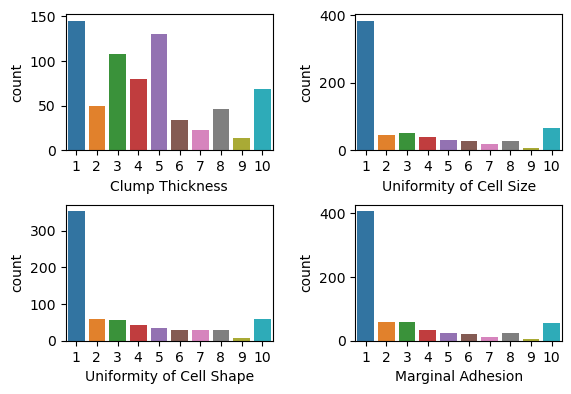

In [38]:
plt.subplot(221)
sns.countplot(x=data.columns[0],data=data)
plt.subplot(222)
sns.countplot(x=data.columns[1],data=data)
plt.subplot(223)
sns.countplot(x=data.columns[2],data=data)
plt.subplot(224)
sns.countplot(x=data.columns[3],data=data)
plt.subplots_adjust(bottom=0.2,wspace=0.4,hspace=0.4)

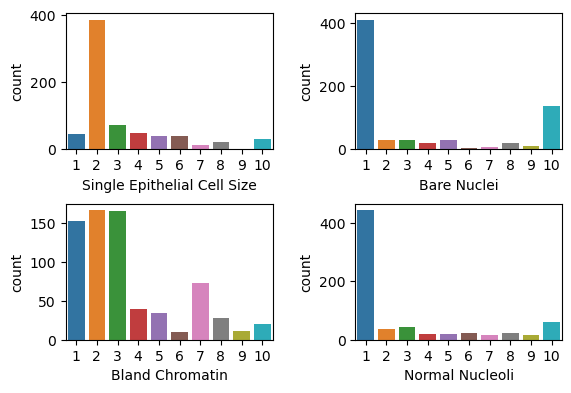

In [39]:
plt.subplot(221)
sns.countplot(x=data.columns[4],data=data)
plt.subplot(222)
sns.countplot(x=data.columns[5],data=data)
plt.subplot(223)
sns.countplot(x=data.columns[6],data=data)
plt.subplot(224)
sns.countplot(x=data.columns[7],data=data)
plt.subplots_adjust(bottom=0.2,wspace=0.4,hspace=0.4)

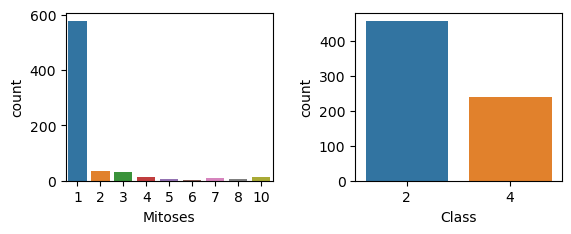

In [40]:
plt.subplot(221)
sns.countplot(x=data.columns[8],data=data)
plt.subplot(222)
sns.countplot(x=data.columns[9],data=data,)
plt.subplots_adjust(wspace=0.4)

<AxesSubplot:>

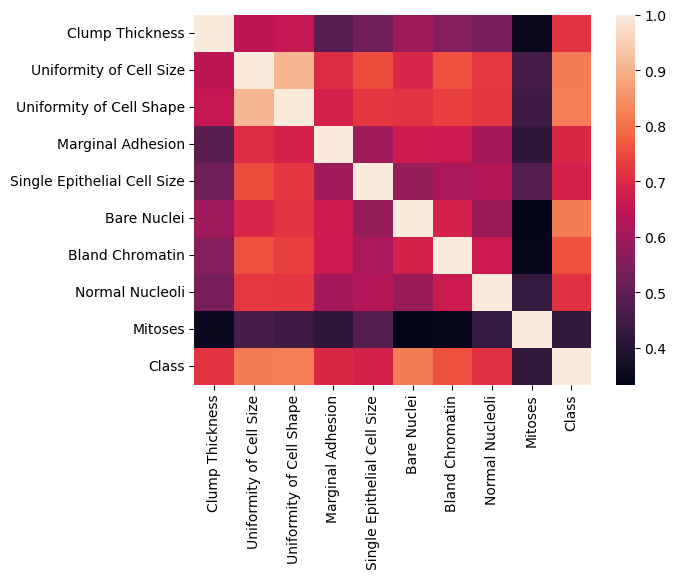

In [41]:
sns.heatmap(data.corr())

In [42]:
data.corr()['Class'].sort_values() #correlation of all features with class

Mitoses                        0.423170
Single Epithelial Cell Size    0.682785
Marginal Adhesion              0.696800
Normal Nucleoli                0.712244
Clump Thickness                0.716001
Bland Chromatin                0.756616
Bare Nuclei                    0.815676
Uniformity of Cell Size        0.817904
Uniformity of Cell Shape       0.818934
Class                          1.000000
Name: Class, dtype: float64

<AxesSubplot:>

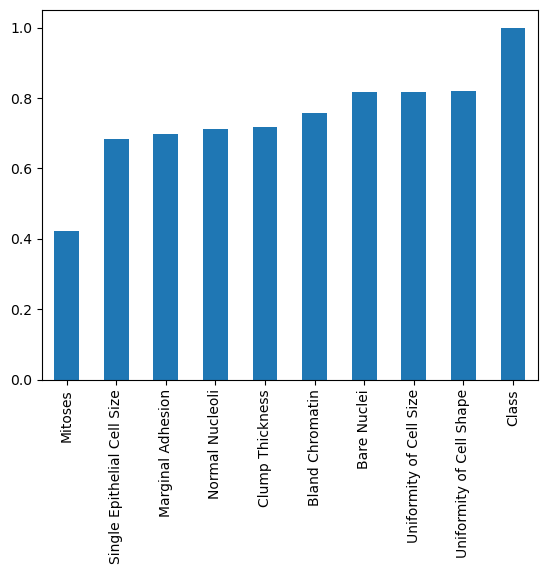

In [43]:
data.corr()['Class'].sort_values().plot(kind='bar')

<AxesSubplot:>

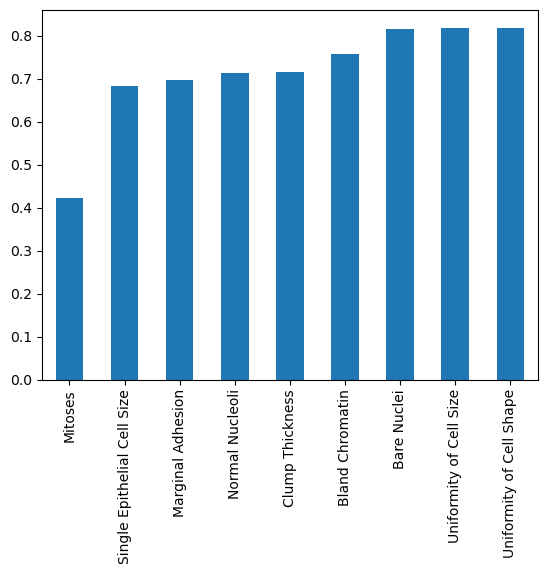

In [44]:
data.corr()['Class'][:-1].sort_values().plot(kind='bar')

## Train Test Split

In [45]:
def class_variable(x):
    if x==2:
        return 0
    else:
        return 1

In [46]:
data['Class']=data['Class'].apply(class_variable)

In [47]:
#write the preprocessed data to csv
data.to_csv("DATA/process.csv",encoding='utf-8',index=False)

In [48]:
X = data.drop('Class',axis=1).values
y = data['Class'].values

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

### Scaling Data

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
scaler = MinMaxScaler()

In [53]:
scaler.fit(X_train)

MinMaxScaler()

In [54]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Logisitic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
accuracy=dict()
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)
print(classification_report(pred,y_test))
print(confusion_matrix(pred,y_test))
from sklearn.metrics import accuracy_score
accuracy['Logistic Regression']=accuracy_score(pred,y_test)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       107
           1       0.97      0.97      0.97        68

    accuracy                           0.98       175
   macro avg       0.98      0.98      0.98       175
weighted avg       0.98      0.98      0.98       175

[[105   2]
 [  2  66]]


### K-nearest Neighbours

In [56]:
from sklearn.neighbors import KNeighborsClassifier
#find the best K value
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_train)
    error_rate.append(np.mean(pred_i != y_train))

Text(0, 0.5, 'Error Rate')

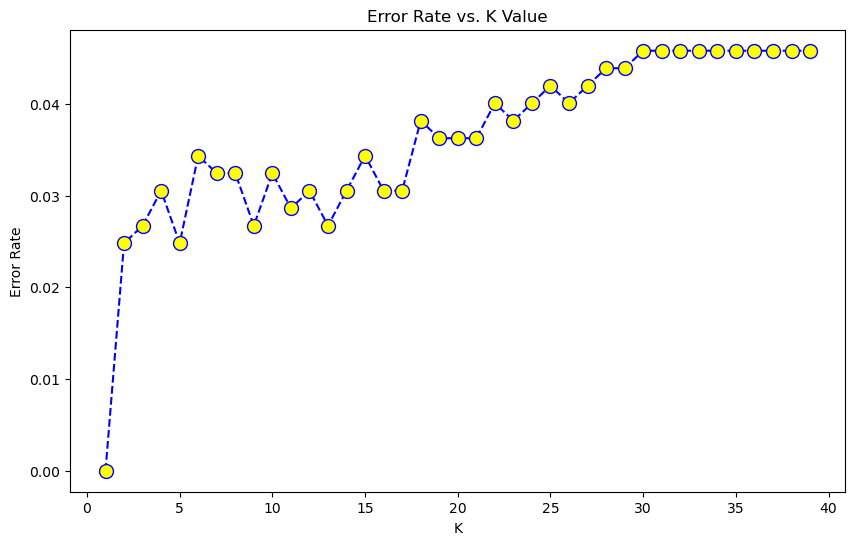

In [57]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate') #error rate differs as the k value increases

In [58]:
#for k=2 is best suitable
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(classification_report(pred,y_test))
print(confusion_matrix(pred,y_test))
accuracy['KNN']=accuracy_score(pred,y_test)

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       120
           1       0.81      1.00      0.89        55

    accuracy                           0.93       175
   macro avg       0.90      0.95      0.92       175
weighted avg       0.94      0.93      0.93       175

[[107  13]
 [  0  55]]


### Naive Bayes

In [59]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)
print(classification_report(pred,y_test))
print(confusion_matrix(pred,y_test))
accuracy['Naive Bayes']=accuracy_score(pred,y_test)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       103
           1       0.97      0.92      0.94        72

    accuracy                           0.95       175
   macro avg       0.96      0.95      0.95       175
weighted avg       0.95      0.95      0.95       175

[[101   2]
 [  6  66]]


### Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='entropy',random_state=0)
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
print(classification_report(pred,y_test))
print(confusion_matrix(pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       108
           1       0.90      0.91      0.90        67

    accuracy                           0.93       175
   macro avg       0.92      0.92      0.92       175
weighted avg       0.93      0.93      0.93       175

[[101   7]
 [  6  61]]


In [61]:
accuracy['Decision Tree']=accuracy_score(pred,y_test)

### Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       107
           1       0.94      0.99      0.96        68

    accuracy                           0.97       175
   macro avg       0.97      0.97      0.97       175
weighted avg       0.97      0.97      0.97       175

[[103   4]
 [  1  67]]


In [63]:
#find the best tree value
error_rate = []

for i in range(1,40):
    rfc = RandomForestClassifier(n_estimators=i,criterion='entropy',random_state=0)
    rfc.fit(X_train,y_train)
    pred_i = rfc.predict(X_train)
    error_rate.append(np.mean(pred_i != y_train))

Text(0, 0.5, 'Error Rate')

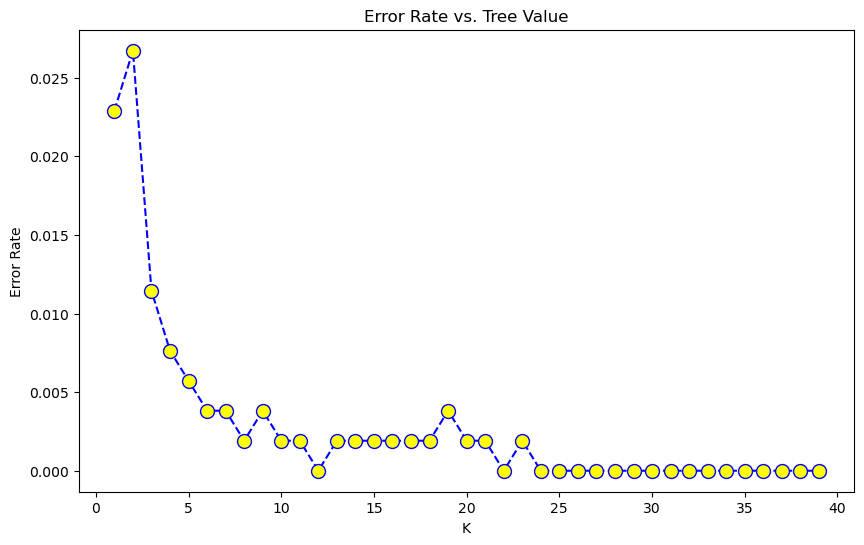

In [64]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=10)
plt.title('Error Rate vs. Tree Value')
plt.xlabel('K')
plt.ylabel('Error Rate') #error rate decrease as the tree value increases

In [65]:
rfc = RandomForestClassifier(n_estimators=12,criterion='entropy',random_state=0)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
accuracy['Random Forest']=accuracy_score(predictions,y_test)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       107
           1       0.96      0.99      0.97        68

    accuracy                           0.98       175
   macro avg       0.97      0.98      0.98       175
weighted avg       0.98      0.98      0.98       175

[[104   3]
 [  1  67]]


### AdaBoosting

In [66]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(n_estimators=50,learning_rate=1)
model=abc.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [67]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       107
           1       0.94      0.91      0.93        68

    accuracy                           0.94       175
   macro avg       0.94      0.94      0.94       175
weighted avg       0.94      0.94      0.94       175

[[103   4]
 [  6  62]]


In [68]:
accuracy['AdaBoosting']=accuracy_score(y_pred,y_test)

### Bagging Classifier

In [69]:
from sklearn.ensemble import BaggingClassifier
cart=DecisionTreeClassifier()
num_trees=100
model=BaggingClassifier(base_estimator=cart,n_estimators=num_trees,random_state=7)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
accuracy['Bagging']=accuracy_score(y_pred,y_test)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       107
           1       0.93      0.99      0.96        68

    accuracy                           0.97       175
   macro avg       0.96      0.97      0.96       175
weighted avg       0.97      0.97      0.97       175

[[102   5]
 [  1  67]]


In [70]:
accuracy

{'Logistic Regression': 0.9771428571428571,
 'KNN': 0.9257142857142857,
 'Naive Bayes': 0.9542857142857143,
 'Decision Tree': 0.9257142857142857,
 'Random Forest': 0.9771428571428571,
 'AdaBoosting': 0.9428571428571428,
 'Bagging': 0.9657142857142857}

### Model Creation

In [71]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [72]:
from tensorflow.keras.callbacks import EarlyStopping

In [73]:
from tensorflow.keras.layers import Dropout

In [74]:
model = Sequential()
model.add(Dense(units=6,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=4,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [75]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [76]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
17/17 [==============================] - 5s 17ms/step - loss: 0.7147 - val_loss: 0.6197
Epoch 2/600
17/17 [==============================] - 0s 4ms/step - loss: 0.7004 - val_loss: 0.6072
Epoch 3/600
17/17 [==============================] - 0s 4ms/step - loss: 0.6787 - val_loss: 0.5946
Epoch 4/600
17/17 [==============================] - 0s 4ms/step - loss: 0.6531 - val_loss: 0.5799
Epoch 5/600
17/17 [==============================] - 0s 4ms/step - loss: 0.6222 - val_loss: 0.5638
Epoch 6/600
17/17 [==============================] - 0s 4ms/step - loss: 0.6165 - val_loss: 0.5445
Epoch 7/600
17/17 [==============================] - 0s 4ms/step - loss: 0.5949 - val_loss: 0.5230
Epoch 8/600
17/17 [==============================] - 0s 4ms/step - loss: 0.5651 - val_loss: 0.5009
Epoch 9/600
17/17 [==============================] - 0s 4ms/step - loss: 0.5654 - val_loss: 0.4807
Epoch 10/600
17/17 [==============================] - 0s 3ms/step - loss: 0.5236 - val_loss: 0.4575
Epoch 11

17/17 [==============================] - 0s 4ms/step - loss: 0.3462 - val_loss: 0.1508
Epoch 84/600
17/17 [==============================] - 0s 4ms/step - loss: 0.3367 - val_loss: 0.1502
Epoch 85/600
17/17 [==============================] - 0s 4ms/step - loss: 0.3838 - val_loss: 0.1510
Epoch 86/600
17/17 [==============================] - 0s 4ms/step - loss: 0.3564 - val_loss: 0.1499
Epoch 87/600
17/17 [==============================] - 0s 4ms/step - loss: 0.3426 - val_loss: 0.1495
Epoch 88/600
17/17 [==============================] - 0s 4ms/step - loss: 0.3477 - val_loss: 0.1485
Epoch 89/600
17/17 [==============================] - 0s 4ms/step - loss: 0.3643 - val_loss: 0.1487
Epoch 90/600
17/17 [==============================] - 0s 3ms/step - loss: 0.3389 - val_loss: 0.1470
Epoch 91/600
17/17 [==============================] - 0s 4ms/step - loss: 0.3697 - val_loss: 0.1461
Epoch 92/600
17/17 [==============================] - 0s 4ms/step - loss: 0.3615 - val_loss: 0.1461
Epoch 93/600


17/17 [==============================] - 0s 4ms/step - loss: 0.2861 - val_loss: 0.1192
Epoch 165/600
17/17 [==============================] - 0s 4ms/step - loss: 0.2932 - val_loss: 0.1184
Epoch 166/600
17/17 [==============================] - 0s 4ms/step - loss: 0.2753 - val_loss: 0.1170
Epoch 167/600
17/17 [==============================] - 0s 4ms/step - loss: 0.2944 - val_loss: 0.1169
Epoch 168/600
17/17 [==============================] - 0s 4ms/step - loss: 0.2876 - val_loss: 0.1164
Epoch 169/600
17/17 [==============================] - 0s 4ms/step - loss: 0.3126 - val_loss: 0.1180
Epoch 170/600
17/17 [==============================] - 0s 4ms/step - loss: 0.2799 - val_loss: 0.1167
Epoch 171/600
17/17 [==============================] - 0s 4ms/step - loss: 0.2938 - val_loss: 0.1171
Epoch 172/600
17/17 [==============================] - 0s 4ms/step - loss: 0.2968 - val_loss: 0.1164
Epoch 173/600
17/17 [==============================] - 0s 4ms/step - loss: 0.2809 - val_loss: 0.1175
Epoc

<AxesSubplot:>

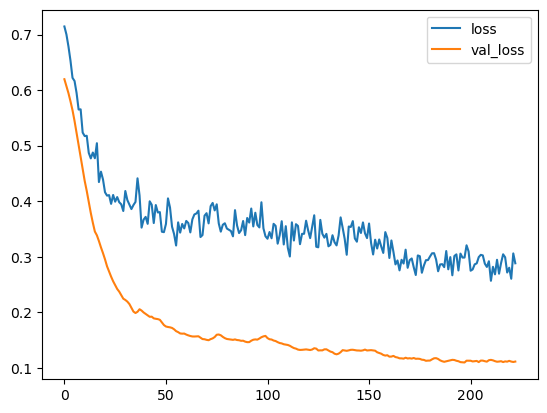

In [77]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [78]:
l=list(model_loss['val_loss'])
print("The maximum validation loss is ",max(l),"\nThe minimum validation loss is",min(l))

The maximum validation loss is  0.6196967363357544 
The minimum validation loss is 0.10945217311382294


In [79]:
predictions=(model.predict(X_test) > 0.5).astype("int32")

6/6 [==============================] - 1s 1ms/step


In [80]:
from sklearn.metrics import classification_report,confusion_matrix

In [81]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       107
           1       0.96      0.99      0.97        68

    accuracy                           0.98       175
   macro avg       0.97      0.98      0.98       175
weighted avg       0.98      0.98      0.98       175



In [82]:
y_test

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0],
      dtype=int64)

In [83]:
predictions.flatten()

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0])

In [84]:
model_2 = Sequential()
model_2.add(Dense(units=9,activation='relu'))
model_2.add(Dropout(0.5))

model_2.add(Dense(units=5,activation='relu'))
model_2.add(Dropout(0.5))

model_2.add(Dense(units=1,activation='sigmoid'))
model_2.compile(loss='binary_crossentropy', optimizer='adam')

In [85]:
model_2.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
17/17 [==============================] - 1s 15ms/step - loss: 0.7285 - val_loss: 0.7331
Epoch 2/600
17/17 [==============================] - 0s 4ms/step - loss: 0.7193 - val_loss: 0.7125
Epoch 3/600
17/17 [==============================] - 0s 4ms/step - loss: 0.7065 - val_loss: 0.6896
Epoch 4/600
17/17 [==============================] - 0s 4ms/step - loss: 0.6718 - val_loss: 0.6641
Epoch 5/600
17/17 [==============================] - 0s 4ms/step - loss: 0.6600 - val_loss: 0.6394
Epoch 6/600
17/17 [==============================] - 0s 4ms/step - loss: 0.6337 - val_loss: 0.6130
Epoch 7/600
17/17 [==============================] - 0s 4ms/step - loss: 0.6052 - val_loss: 0.5858
Epoch 8/600
17/17 [==============================] - 0s 4ms/step - loss: 0.6081 - val_loss: 0.5608
Epoch 9/600
17/17 [==============================] - 0s 4ms/step - loss: 0.5923 - val_loss: 0.5366
Epoch 10/600
17/17 [==============================] - 0s 4ms/step - loss: 0.5749 - val_loss: 0.5122
Epoch 11

17/17 [==============================] - 0s 4ms/step - loss: 0.2694 - val_loss: 0.0942
Epoch 84/600
17/17 [==============================] - 0s 4ms/step - loss: 0.2892 - val_loss: 0.0942
Epoch 85/600
17/17 [==============================] - 0s 4ms/step - loss: 0.2652 - val_loss: 0.0941
Epoch 86/600
17/17 [==============================] - 0s 4ms/step - loss: 0.2845 - val_loss: 0.0934
Epoch 87/600
17/17 [==============================] - 0s 4ms/step - loss: 0.2594 - val_loss: 0.0928
Epoch 88/600
17/17 [==============================] - 0s 4ms/step - loss: 0.2463 - val_loss: 0.0927
Epoch 89/600
17/17 [==============================] - 0s 4ms/step - loss: 0.2247 - val_loss: 0.0914
Epoch 90/600
17/17 [==============================] - 0s 4ms/step - loss: 0.2616 - val_loss: 0.0915
Epoch 91/600
17/17 [==============================] - 0s 4ms/step - loss: 0.2816 - val_loss: 0.0920
Epoch 92/600
17/17 [==============================] - 0s 4ms/step - loss: 0.2585 - val_loss: 0.0911
Epoch 93/600


17/17 [==============================] - 0s 4ms/step - loss: 0.2116 - val_loss: 0.0753
Epoch 165/600
17/17 [==============================] - 0s 4ms/step - loss: 0.2230 - val_loss: 0.0737
Epoch 166/600
17/17 [==============================] - 0s 4ms/step - loss: 0.2329 - val_loss: 0.0737
Epoch 167/600
17/17 [==============================] - 0s 4ms/step - loss: 0.2382 - val_loss: 0.0731
Epoch 168/600
17/17 [==============================] - 0s 4ms/step - loss: 0.2267 - val_loss: 0.0731
Epoch 169/600
17/17 [==============================] - 0s 4ms/step - loss: 0.2366 - val_loss: 0.0738
Epoch 170/600
17/17 [==============================] - 0s 4ms/step - loss: 0.2459 - val_loss: 0.0741
Epoch 171/600
17/17 [==============================] - 0s 4ms/step - loss: 0.2142 - val_loss: 0.0740
Epoch 172/600
17/17 [==============================] - 0s 4ms/step - loss: 0.2366 - val_loss: 0.0733
Epoch 173/600
17/17 [==============================] - 0s 4ms/step - loss: 0.2277 - val_loss: 0.0730
Epoc

<AxesSubplot:>

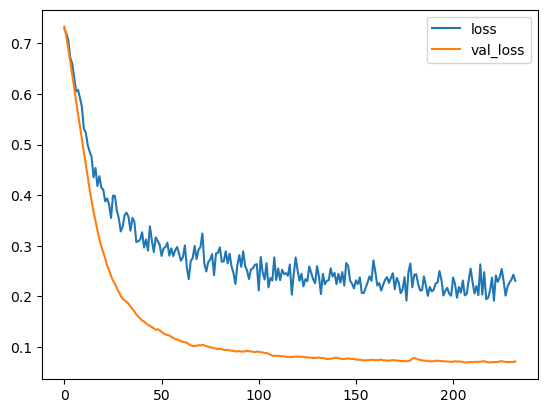

In [86]:
model_loss = pd.DataFrame(model_2.history.history)
model_loss.plot()

In [87]:
l=list(model_loss['val_loss'])
print("The maximum validation loss is ",max(l),"\nThe minimum validation loss is",min(l))

The maximum validation loss is  0.733147382736206 
The minimum validation loss is 0.06957211345434189


In [88]:
predictions=(model_2.predict(X_test) > 0.5).astype("int32")

6/6 [==============================] - 0s 1ms/step


In [92]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       105
           1       0.99      0.96      0.97        70

    accuracy                           0.98       175
   macro avg       0.98      0.97      0.98       175
weighted avg       0.98      0.98      0.98       175



In [95]:
accuracy['ANN']=accuracy_score(y_test,predictions)

In [96]:
accuracy

{'Logistic Regression': 0.9771428571428571,
 'KNN': 0.9257142857142857,
 'Naive Bayes': 0.9542857142857143,
 'Decision Tree': 0.9257142857142857,
 'Random Forest': 0.9771428571428571,
 'AdaBoosting': 0.9428571428571428,
 'Bagging': 0.9657142857142857,
 'ANN': 0.9771428571428571}

In [97]:
color=['blue','black','yellow','green','red','pink','violet','gold']

<BarContainer object of 8 artists>

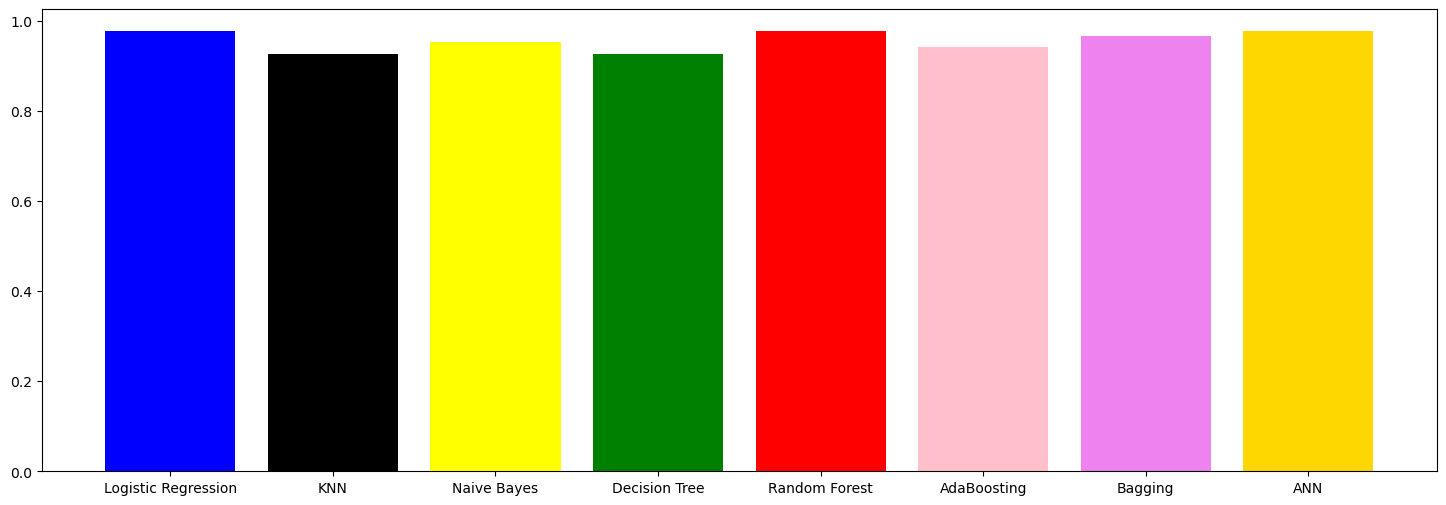

In [98]:
plt.figure(figsize=(18,6))
plt.bar(x=accuracy.keys(),height=accuracy.values(),color=color)

### Save the model in JSON format and weights in h5 format

In [115]:
model_json=model_2.to_json()

In [116]:
with open("model_ann_new.json","w") as json_file:
    json_file.write(model_json)

In [117]:
model_2.save_weights("model_ann_new_weights.h5")

### Predict the new feature target value

In [106]:
val=list(data.iloc(0)[0])
l=np.array(val[:9])

In [108]:
l=scaler.transform([l])


In [109]:
pred=(model_2.predict(l)>0.5).astype("int32")

1/1 [==============================] - 0s 87ms/step


In [111]:
pred

array([[0]])

In [185]:
data.columns[::-1]

Index(['Class', 'Mitoses', 'Normal Nucleoli', 'Bland Chromatin', 'Bare Nuclei',
       'Single Epithelial Cell Size', 'Marginal Adhesion',
       'Uniformity of Cell Shape', 'Uniformity of Cell Size',
       'Clump Thickness'],
      dtype='object')

In [99]:
new_feature=[5,1,2,2,5,3,3,2,1]

In [100]:
new_feature[:9]

[5, 1, 2, 2, 5, 3, 3, 2, 1]

In [187]:
new_feature=np.array(new_feature)

In [188]:
new_feature=scaler.transform([new_feature])

In [190]:
new_feature

array([[0.44444444, 0.        , 0.11111111, 0.11111111, 0.44444444,
        0.22222222, 0.22222222, 0.11111111, 0.        ]])

In [191]:
pred=(model_2.predict(new_feature)>0.5).astype("int32")

1/1 [==============================] - 0s 37ms/step


In [193]:
pred[0][0]

0

In [194]:
pred_mod=(model.predict(new_feature)>0.5).astype("int32")

1/1 [==============================] - 0s 43ms/step


In [196]:
pred_mod[0][0]

0